In [14]:
import pandas as pd
from pathlib import Path
import networkx as nx
import itertools
import matplotlib.pyplot as plt 

In [21]:
# ファイル読み込み
data_path = Path("./data/work_4.csv")
edge_list: list[tuple[int, int]] = []
max_index: int = 0 
with open(data_path, "r") as f: 
    while True: 
        s = f.readline() 
        if s == "": 
            break 
        fr, to = map(int, s.split(" "))
        edge_list.append((fr, to))
        max_index = max(max_index, fr, to)

edge_graph = [set() for _ in range(max_index + 1)]
for fr, to in edge_list: 
    mi = min(fr, to)
    ma = max(fr, to)
    edge_graph[mi].add(ma)

[(17, 1), (72, 1), (3, 2), (19, 2), (20, 2), (27, 2), (29, 2), (31, 2), (48, 2), (65, 2), (67, 2), (69, 2), (71, 2), (132, 2), (136, 2), (4, 3), (19, 3), (20, 3), (28, 3), (31, 3), (65, 3), (67, 3), (69, 3), (71, 3), (132, 3), (136, 3), (19, 4), (20, 4), (27, 4), (29, 4), (31, 4), (54, 4), (69, 4), (71, 4), (132, 4), (136, 4), (22, 5), (72, 5), (9, 6), (13, 6), (16, 6), (26, 6), (47, 6), (49, 6), (64, 6), (66, 6), (105, 6), (11, 7), (12, 7), (24, 7), (74, 7), (75, 7), (112, 8), (124, 8), (13, 9), (47, 9), (49, 9), (51, 9), (56, 9), (66, 9), (74, 9), (75, 9), (78, 9), (91, 9), (139, 9), (17, 10), (21, 10), (37, 10), (53, 10), (70, 10), (72, 10), (122, 10), (124, 10), (12, 11), (17, 11), (32, 11), (37, 11), (74, 11), (124, 11), (137, 11), (32, 12), (37, 12), (74, 12), (75, 12), (26, 13), (32, 13), (47, 13), (49, 13), (56, 13), (66, 13), (75, 13), (105, 13), (139, 13), (16, 14), (22, 14), (26, 14), (50, 14), (64, 14), (68, 14), (72, 14), (73, 14), (132, 14), (85, 15), (26, 16), (47, 16), 

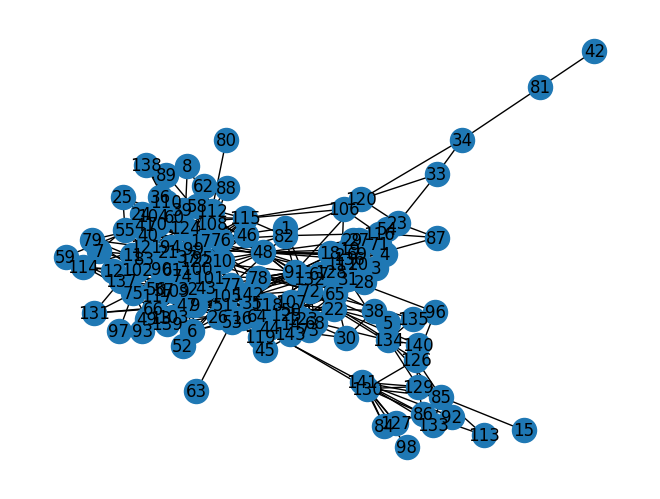

In [23]:
G = nx.Graph()
G.add_edges_from(edge_list)
nx.draw(G, with_labels=True)
plt.show()

In [24]:
G = nx.Graph()
G.add_edges_from(edge_list)
k = 2
comp = nx.community.girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 87, 88, 89, 90, 91, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 128, 131, 132, 134, 135, 136, 137, 138, 139, 140, 142, 143], [15, 84, 85, 86, 92, 96, 98, 113, 126, 127, 129, 130, 133, 141])
([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 87, 88, 89, 90, 91, 93, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107,

In [25]:
tuple(sorted(c) for c in next(comp))

([6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  17,
  21,
  23,
  24,
  25,
  26,
  32,
  33,
  35,
  36,
  37,
  39,
  40,
  41,
  43,
  44,
  45,
  46,
  47,
  49,
  50,
  51,
  52,
  53,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  68,
  70,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  82,
  83,
  87,
  88,
  89,
  90,
  91,
  93,
  94,
  95,
  97,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  128,
  131,
  137,
  138,
  139,
  142,
  143],
 [1,
  2,
  3,
  4,
  5,
  18,
  19,
  20,
  22,
  27,
  28,
  29,
  30,
  31,
  38,
  48,
  54,
  65,
  67,
  69,
  71,
  72,
  132,
  134,
  135,
  136,
  140],
 [15, 84, 85, 86, 92, 96, 98, 113, 126, 127, 129, 130, 133, 141],
 [34, 42, 81])

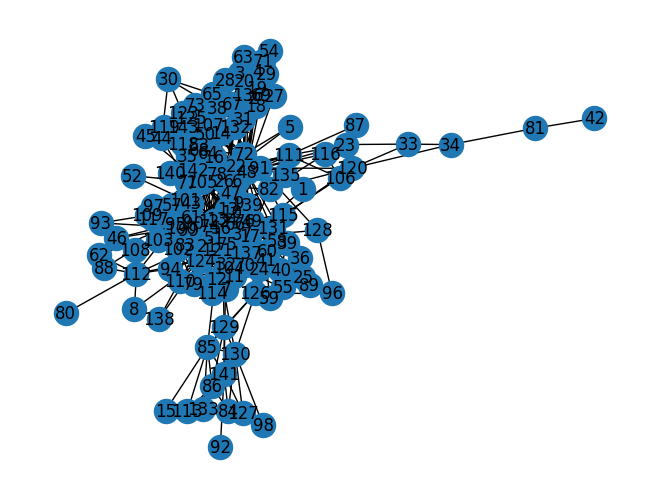

In [22]:
G = nx.Graph()
G.add_edges_from(edge_list)
nx.draw(G, with_labels=True)
plt.show()